In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.svm import SVC , LinearSVC # SVM classification, linearSVC classifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("Downloads/dataset.csv", delimiter=';', skiprows=1)
pd.set_option('display.max_columns', None)
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


In [3]:
#df.info()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,189.0,95.000000,54.703748,1.0,48.0,95.0,142.0,189.0
SR,189.0,9633.227513,46256.078309,30.0,300.0,700.0,3300.0,500000.0
NR,189.0,1.566138,1.544419,1.0,1.0,1.0,1.0,12.0
TR,189.0,4.952381,5.590918,1.0,1.0,1.0,12.0,15.0
VR,189.0,1.904762,1.317407,0.0,1.0,2.0,3.0,4.0
SUR1,189.0,4.232804,3.434615,1.0,2.0,2.0,7.0,14.0
SUR2,189.0,5.391534,3.515185,1.0,2.0,6.0,9.0,11.0
SUR3,189.0,5.841270,3.293480,1.0,2.0,6.0,9.0,11.0
UR,189.0,0.841270,1.315291,0.0,0.0,0.0,3.0,3.0
FR,189.0,0.846561,1.349843,0.0,0.0,0.0,2.0,4.0


In [5]:
#df.isna().sum(). we do not have a missing value

<Axes: xlabel='TR', ylabel='count'>

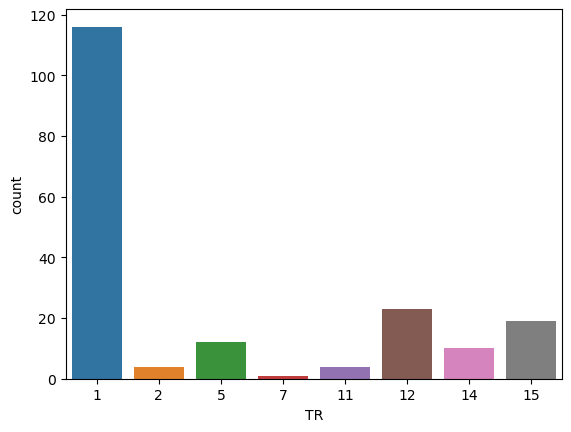

In [6]:
sns.countplot(x=df['TR'])

In [7]:
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


In [8]:
df_frog = df.iloc[:,15:].copy()
#df_frog.head()

dico_frog = {}
for item in df_frog.columns:
    dico_frog[item] = df_frog[item].sum()
dico_frog 

    


{'CR': 192,
 'Green frogs': 108,
 'Brown frogs': 148,
 'Common toad': 124,
 'Fire-bellied toad': 58,
 'Tree frog': 71,
 'Common newt': 58,
 'Great crested newt': 21}

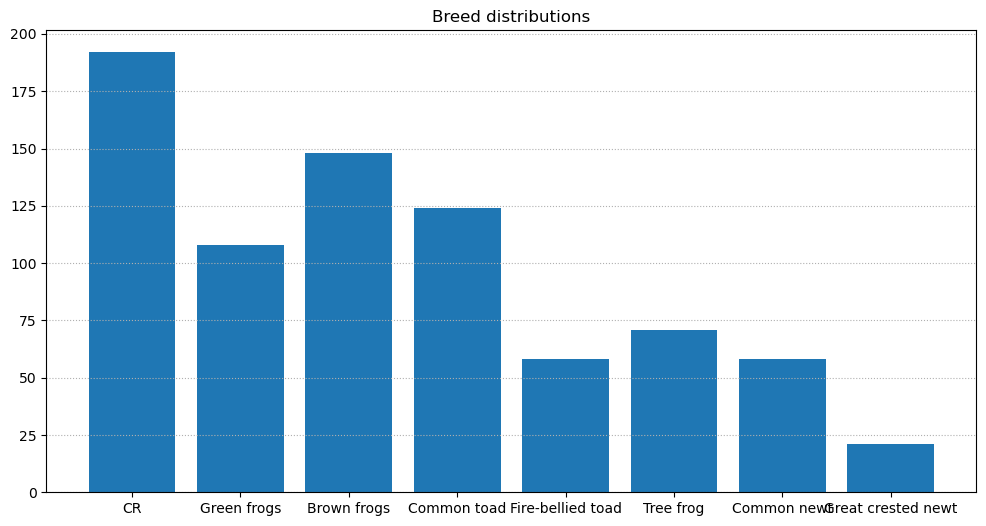

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.title("Breed distributions")
plt.bar(dico_frog.keys(), [dico_frog.get(item) for item in dico_frog.keys()])
plt.grid(linestyle='dotted', which='both', axis='y')
plt.show()

In [10]:
# Encoding the only cat feature we have in the data
df['Motorway'] = LabelEncoder().fit_transform(df['Motorway'])

In [11]:
df = df.drop(["ID"], axis=1)
df.head()

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,0,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,0,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,0,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,0,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,0,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


In [12]:

X = df.iloc[:,:14].values
y = df.iloc[:, 15:].values



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:14], df.iloc[:, 15:], test_size=0.2, random_state=42)

In [14]:
def Classificateur_Logistic():
    print('\t============= Logistic =============\n')
    logistic_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('log_model', LogisticRegression(
    random_state=0,
    solver='lbfgs',
    multi_class='auto'))
    ])
    for item in df.iloc[:, 15:].columns:
        logistic_clf.fit(X_train, y_train[item])
        logistic_clf_pred = logistic_clf.predict(X_test)
        rapport = '\n--- classification report {}---\n{}'.format(item, classification_report(y_test[item], logistic_clf_pred, output_dict=False, zero_division=0))
        print(rapport, '\n')  

In [23]:
def Random_forest():
    print('\t============= RANDOM FOREST =============\n')
    random_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rand_model', RandomForestClassifier(n_estimators=100,))
    ])
    for item in df.iloc[:, 15:].columns:
        random_clf.fit(X_train, y_train[item])
        random_clf_pred = random_clf.predict(X_test)
        rapport = '\n--- classification report {}---\n{}'.format(item, classification_report(y_test[item], random_clf_pred, output_dict=False, zero_division=0))
        print(rapport, '\n')


        


    

In [24]:
Classificateur_Logistic()
Random_forest()

	============= Logistic =============


--- classification report Green frogs---
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.74      0.81      0.77        21

    accuracy                           0.74        38
   macro avg       0.74      0.73      0.73        38
weighted avg       0.74      0.74      0.73        38
 


--- classification report Brown frogs---
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.82      0.93      0.87        30

    accuracy                           0.79        38
   macro avg       0.66      0.59      0.60        38
weighted avg       0.76      0.79      0.76        38
 


--- classification report Common toad---
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.60      0.78      0.68        23

    accuracy 